Vibhor Malik - Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, MaxPool2D, Flatten

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166



This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed = 123, validation_split = 0.2,
                                                              image_size = (img_height, img_width),
                                                              subset = 'training',
                                                              batch_size = batch_size,
                                                              color_mode = 'rgb')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split=0.2,
                                                            image_size = (img_height, img_width),
                                                            subset='validation',
                                                            batch_size = batch_size,
                                                            color_mode = 'rgb')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

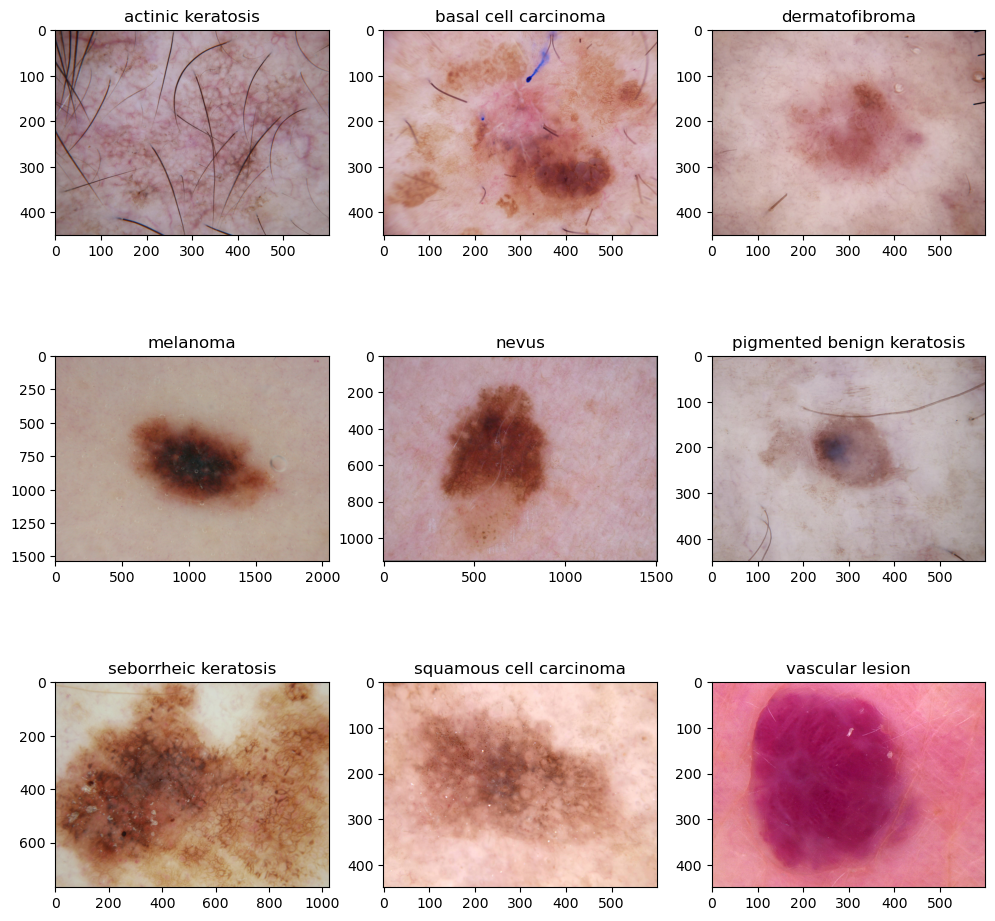

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(12,12))
for i in range(9):
  plt.subplot(3, 3, i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
model = Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1/255,
                                                                       input_shape=(180, 180, 3),
                                                                       offset=0.0)])

model.add(Conv2D(filters=32, kernel_size= (3,3), activation='relu', padding='same', input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                        

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\vib\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 123s 695ms/step - loss: 2.1506 - accuracy: 0.1660 - val_loss: 1.9026 - val_accuracy: 0.3267
Epoch 2/20
169/169 [==============================] - 116s 687ms/step - loss: 1.6896 - accuracy: 0.3450 - val_loss: 1.6165 - val_accuracy: 0.3920
Epoch 3/20
169/169 [==============================] - 116s 687ms/step - loss: 1.5474 - accuracy: 0.3993 - val_loss: 1.5135 - val_accuracy: 0.4083
Epoch 4/20
169/169 [==============================] - 116s 689ms/step - loss: 1.4745 - accuracy: 0.4295 - val_loss: 1.4043 - val_accuracy: 0.4365
Epoch 5/20
169/169 [==============================] - 119s 704ms/step - loss: 1.3505 - accuracy: 0.4750 - val_loss: 1.2926 - val_accuracy: 0.4929
Epoch 6/20
169/169 [==============================] - 117s 694ms/step - loss: 1.2904 - accuracy: 0.4987 - val_loss: 1.3246 - val_accuracy: 0.4818
Epoch 7/20
169/169 [==============================] - 117s 690ms/step - loss: 1.2536 - accuracy: 0.5180 - val_loss: 1.1943 - val_accura

### Visualizing training results

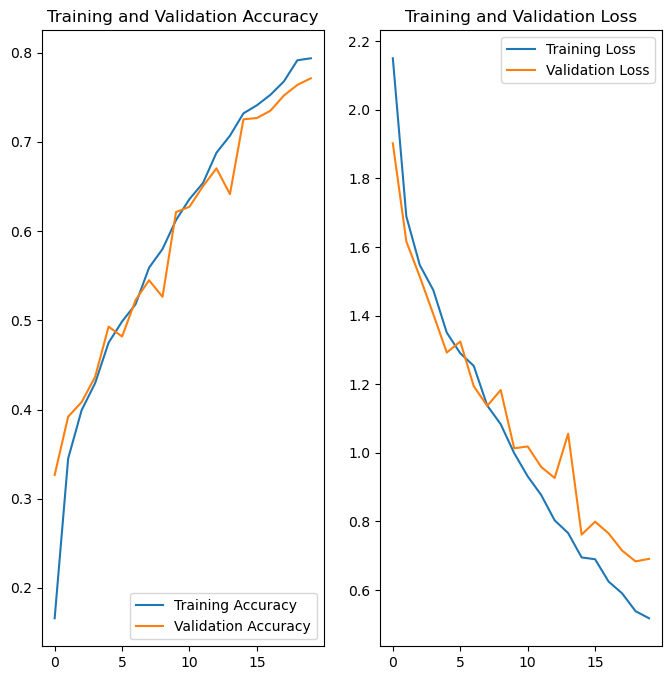

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- Validation Accuracy is much lesser than Training accuracy.
- The Training accuracy is around 69%
- The Validation accuracy is around 52% and tending downwards
- The training accuracy increases with increase in epochs.
- But validation accuracy seems to be stable and obviously decreases with increase in epochs as model may tend to overfit.
- Validation loss and training loss seems to be same till 10 epochs approx and then validation loss increases and training loss further decreases with increase in epochs which is expected.

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = tf.keras.Sequential([
                                          layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                                          layers.experimental.preprocessing.RandomRotation(0.2)
])

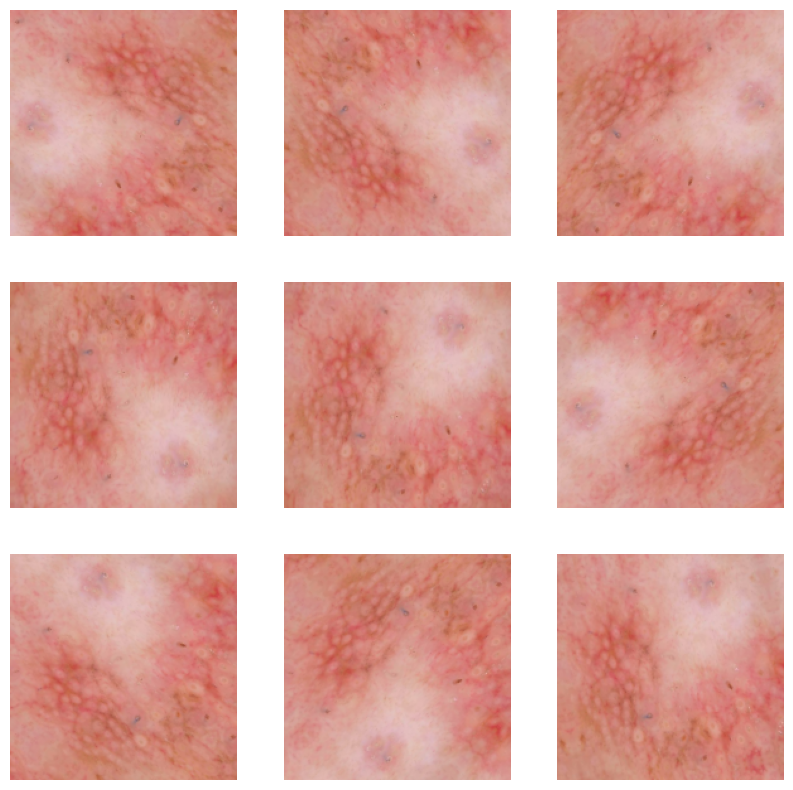

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

image, label = next(iter(train_ds))
image = np.array(image ,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

### Todo:
### Create the model, compile and train the model

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## code goes here
model=Sequential([data_augmentation,
                  tf.keras.layers.experimental.preprocessing.Rescaling(1/255,
                                                                       input_shape=(180, 180, 3), offset=0.0)])

model.add(Conv2D(filters=32, kernel_size= (3,3), activation='relu', padding='same', input_shape=(180, 180, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='softmax'))

### Compiling the model

In [19]:
##  code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 123s 715ms/step - loss: 2.0758 - accuracy: 0.1886 - val_loss: 1.8312 - val_accuracy: 0.2977
Epoch 2/20
169/169 [==============================] - 120s 712ms/step - loss: 1.7424 - accuracy: 0.3284 - val_loss: 1.5959 - val_accuracy: 0.3920
Epoch 3/20
169/169 [==============================] - 122s 724ms/step - loss: 1.5773 - accuracy: 0.3898 - val_loss: 1.5013 - val_accuracy: 0.4061
Epoch 4/20
169/169 [==============================] - 121s 715ms/step - loss: 1.5013 - accuracy: 0.4199 - val_loss: 1.4849 - val_accuracy: 0.4254
Epoch 5/20
169/169 [==============================] - 121s 714ms/step - loss: 1.4298 - accuracy: 0.4444 - val_loss: 1.4377 - val_accuracy: 0.4365
Epoch 6/20
169/169 [==============================] - 121s 714ms/step - loss: 1.3885 - accuracy: 0.4583 - val_loss: 1.4812 - val_accuracy: 0.4120
Epoch 7/20
169/169 [==============================] - 120s 713ms/step - loss: 1.3530 - accuracy: 0.4792 - val_loss: 1.3402 -

### Visualizing the results

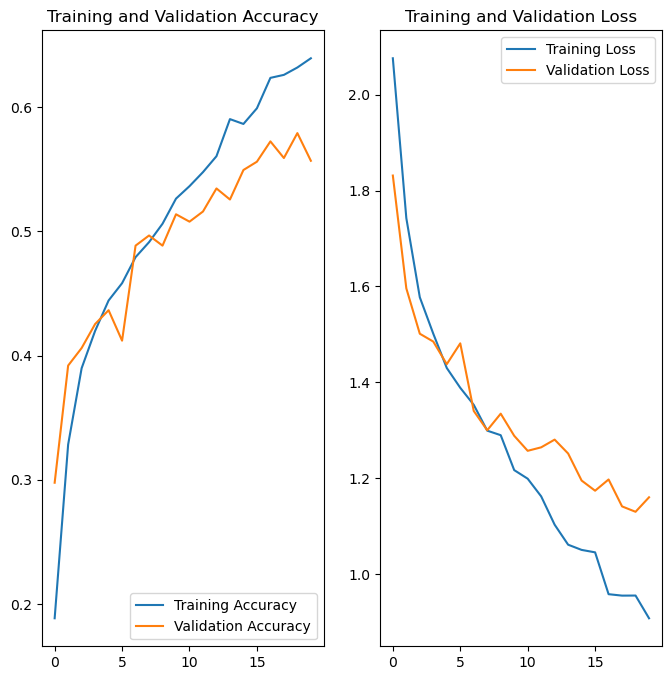

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- The Training accuracy and validation accuracy are almost equal and follow similar trends now.
- Well the training and testing accuracy are almost equal, the problem of overfitting has been addressed with data augmentation and now both accuracies are tend to be same.
- So Now we have to deal with reduces accuracies.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.
for i in range(len(class_names)):
  class_name= class_names[i]
  count = str(len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))
  print(class_name +" - "+ count)

actinic keratosis - 114
basal cell carcinoma - 376
dermatofibroma - 95
melanoma - 438
nevus - 357
pigmented benign keratosis - 462
seborrheic keratosis - 77
squamous cell carcinoma - 181
vascular lesion - 139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

The training dataset the distribution of images are uneven.

- seborrheic keratosis - 77
- squamous cell carcinoma - 181
- vascular lesion - 139
- actinic keratosis - 114


Samples above cases are very less in comparison to the other cases. we need to increase the samples in each case.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [84]:
path_to_training_dataset=str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+'/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17791E21D30>: 100%|█| 500/500 [00:01<00:00, 309.60 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x177884AFDC0>: 100%|█| 500/500 [00:01<00:


Initialised with 95 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x177F08F7EE0>: 100%|█| 500/500 [00:01<00:00, 311.91 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x17788397D90>: 100%|█| 500/500 [00:07<00:00, 66.15 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1778855FDC0>: 100%|█| 500/500 [00:07<00:00, 68.92 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x177F3D8FA60>: 100%|█| 500/500 [00:01<00:00, 309.94 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x177883E5040>: 100%|█| 500/500 [00:03<00:00, 138.36 Sample


Initialised with 181 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1778F49F970>: 100%|█| 500/500 [00:01<00:00, 317.60 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\vib\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x17791E69880>: 100%|█| 500/500 [00:01<00:00, 318.27 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [85]:
from glob import glob
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [86]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\vib\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1db44645-9111-4e86-9032-70f533046fa9.jpg',
 'C:\\Users\\vib\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2fbd6f76-c7b2-4729-b1b6-861df5760d16.jpg',
 'C:\\Users\\vib\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_699ea123-caab-44cb-928e-8568e3a1e1ab.jpg',
 'C:\\Users\\vib\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_71201d33-126e-408d-bf77-eb75cc17f49b.jpg',
 'C:\\Users\\vib\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin

In [87]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [88]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [90]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [93]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [97]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [100]:
##  code goes here
model=Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1/255,
                                                                       input_shape = (180, 180 ,3),
                                                                       offset = 0.0)])

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (180, 180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64,kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size =( 2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [101]:
##  code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [102]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


C:\Users\vib\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


394/394 [==============================] - 293s 741ms/step - loss: 2.0362 - accuracy: 0.1974 - val_loss: 1.7174 - val_accuracy: 0.3184
Epoch 2/50
394/394 [==============================] - 287s 728ms/step - loss: 1.5183 - accuracy: 0.4015 - val_loss: 1.3789 - val_accuracy: 0.4665
Epoch 3/50
394/394 [==============================] - 291s 738ms/step - loss: 1.2991 - accuracy: 0.4996 - val_loss: 1.3055 - val_accuracy: 0.4986
Epoch 4/50
394/394 [==============================] - 289s 732ms/step - loss: 1.0707 - accuracy: 0.5873 - val_loss: 0.9170 - val_accuracy: 0.6737
Epoch 5/50
394/394 [==============================] - 288s 731ms/step - loss: 0.8992 - accuracy: 0.6563 - val_loss: 0.7573 - val_accuracy: 0.7315
Epoch 6/50
394/394 [==============================] - 291s 739ms/step - loss: 0.7372 - accuracy: 0.7236 - val_loss: 0.6646 - val_accuracy: 0.7439
Epoch 7/50
394/394 [==============================] - 303s 769ms/step - loss: 0.6375 - accuracy: 0.7600 - val_loss: 0.5884 - val_accura

#### **Todo:**  Visualize the model results

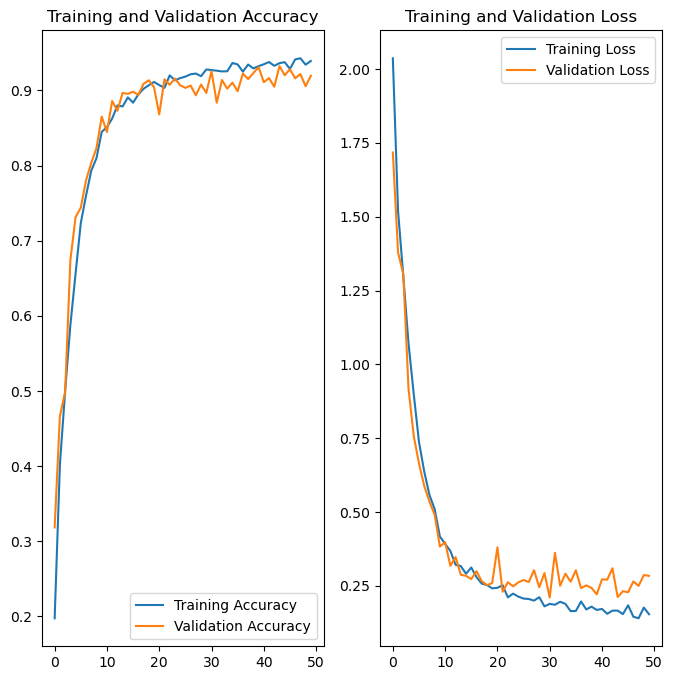

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- Accuracy of training set is around 94%
- The Accuracy of validation dats set is around 91%
- We may run extra epochs to see if the model performs better. But, in such case there could be a problem of overfitting as well.
- The model with the above accuracy shows an increased performace of the model when we train with dataset where number of images in each class is balanced.
- We can see that the model performed better on augmented data.
- After 10 epochs validation loss tends to slight increase and traning loss was decrease 